<a href="https://colab.research.google.com/github/carlosmaestro/curso-alura-texto-ocr-opencv/blob/main/Aula-5/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final

## Preparando o ambiente

Biblioteca e dados

In [2]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NE

In [12]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


In [14]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow

In [15]:
pytesseract.__version__

'0.3.9'

In [16]:
cv2.__version__

'4.6.0'

In [17]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2023-02-04 00:03:39--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-02-04 00:03:40--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-02-04 00:03:40--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

## Entendendo os dados

In [64]:
projeto = '/content/text-recognize/Imagens/Projeto'
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)

['/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png']


In [19]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

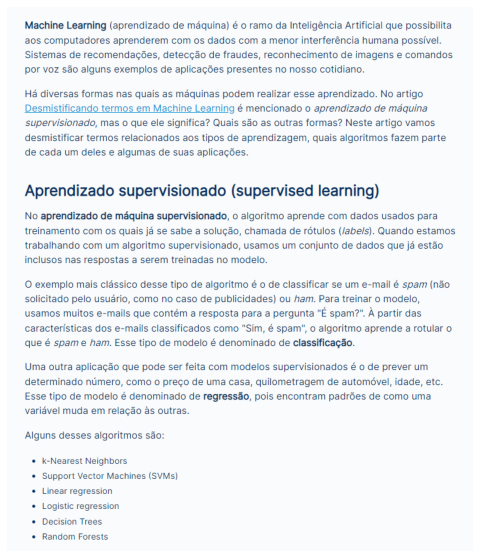

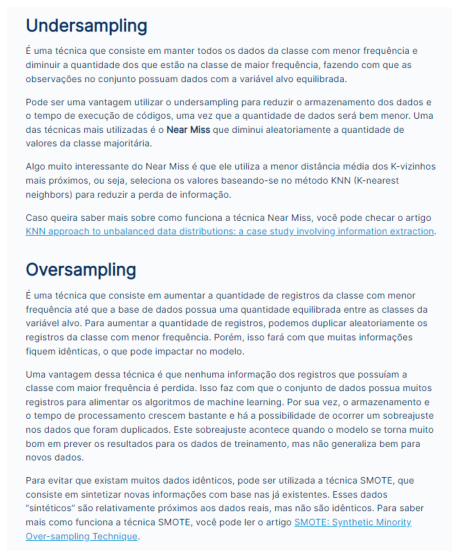

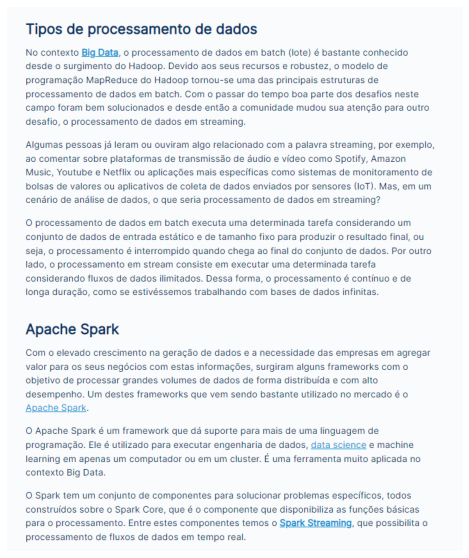

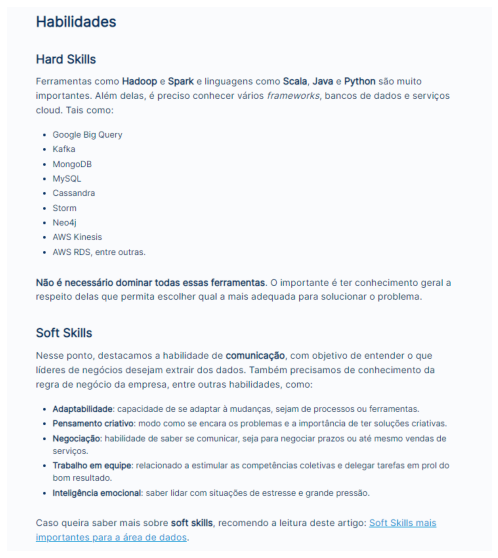

In [20]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)

In [65]:
config_tesseract = "--tessdata-dir tessdata"

def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

## Reconhecimento de texto

In [66]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt' 

In [67]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  nome_divisao = '===============\n' + str(nome_imagem)
  texto_completo = texto_completo + nome_divisao + '\n'
  texto = OCR_processa(img, config_tesseract)
  texto_completo = texto_completo + texto

In [25]:
texto_completo

'===============\nartigo-termos-ML.png\nMachine Learning (aprendizado de máquina) é o ramo da Inteligência Artificial que possibilita\naos computadores aprenderem com os dados com a menor interferência humana possível.\nSistemas de recomendações, detecção de fraudes, reconhecimento de imagens e comandos\npor voz são alguns exemplos de aplicações presentes no nosso cotidiano.\n\nHá diversas formas nas quais as máquinas podem realizar esse aprendizado. No artigo\nDesmistificando termos em Machine Learning é mencionado o aprendizado de máquina\nsupervisionado, mas o que ele significa? Quais são as outras formas? Neste artigo vamos\ndesmistificar termos relacionados aos tipos de aprendizagem, quais algoritmos fazem parte\nde cada um deles e algumas de suas aplicações.\n\nAprendizado supervisionado (supervised learning)\n\nNo aprendizado de máquina supervisionado, o algoritmo aprende com dados usados para\n\ntreinamento com os quais já se sabe a solução, chamada de rótulos (/abels). Quando 

In [26]:
arquivo_txt = open(nome_txt, 'w+')
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()

## Busca de ocorrências

In [33]:
termo_pesquisa = 'learning'

In [28]:
with open(nome_txt) as f: 
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]

In [29]:
ocorrencias

[803, 3657, 6334]

In [34]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print('===============\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  print('\n')

artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1


artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1


artigo-spark.png
Número de ocorrências para o termo: learning: 1


artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0




## Atividade

In [35]:
projeto = '/content/text-recognize/Atividades/Aula 5'
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)

['/content/text-recognize/Atividades/Aula 5/Aula5-ROC.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Microstrategy.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Ambientes_Virtuais.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Visao.png', '/content/text-recognize/Atividades/Aula 5/Aula5-GitHub.png']


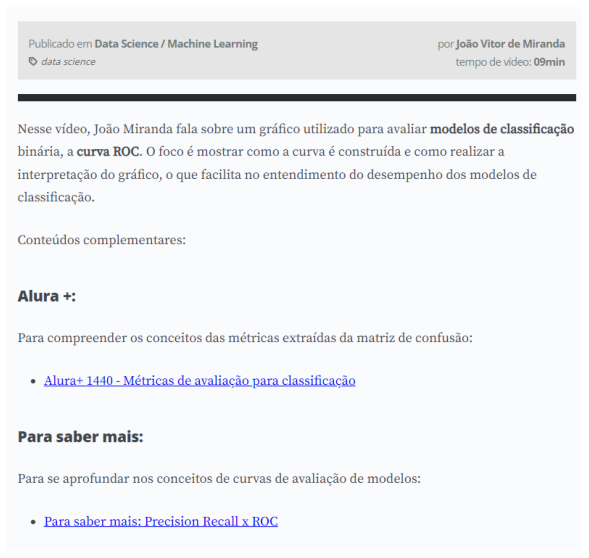

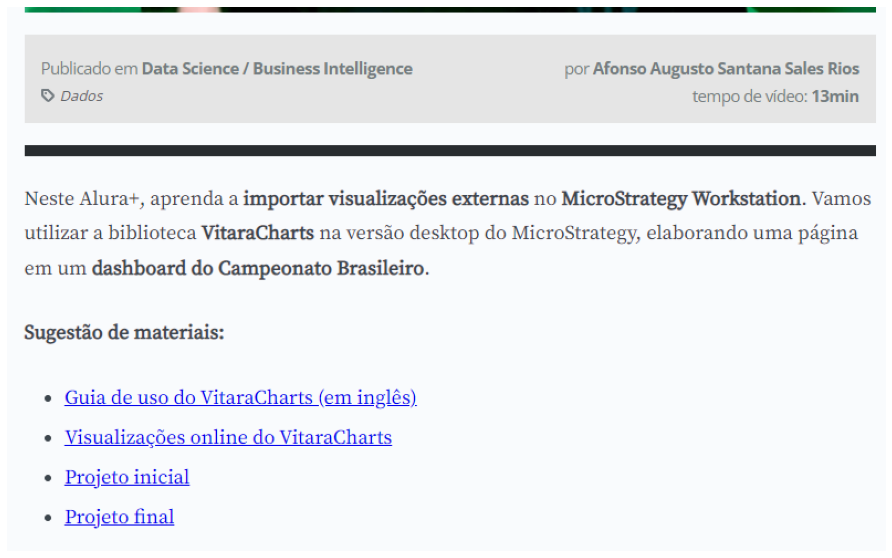

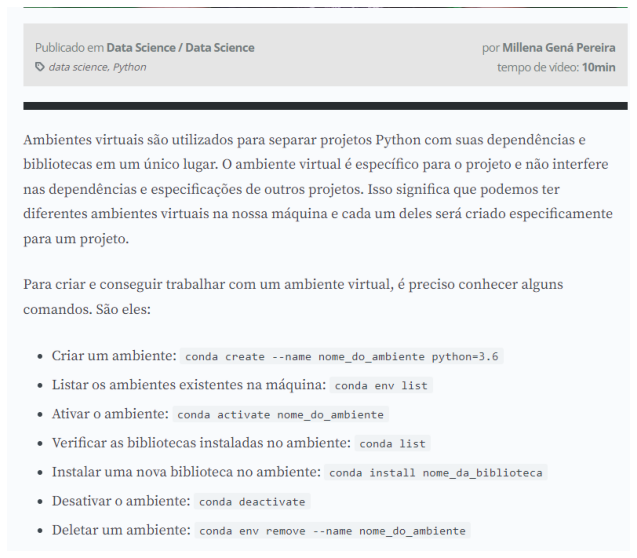

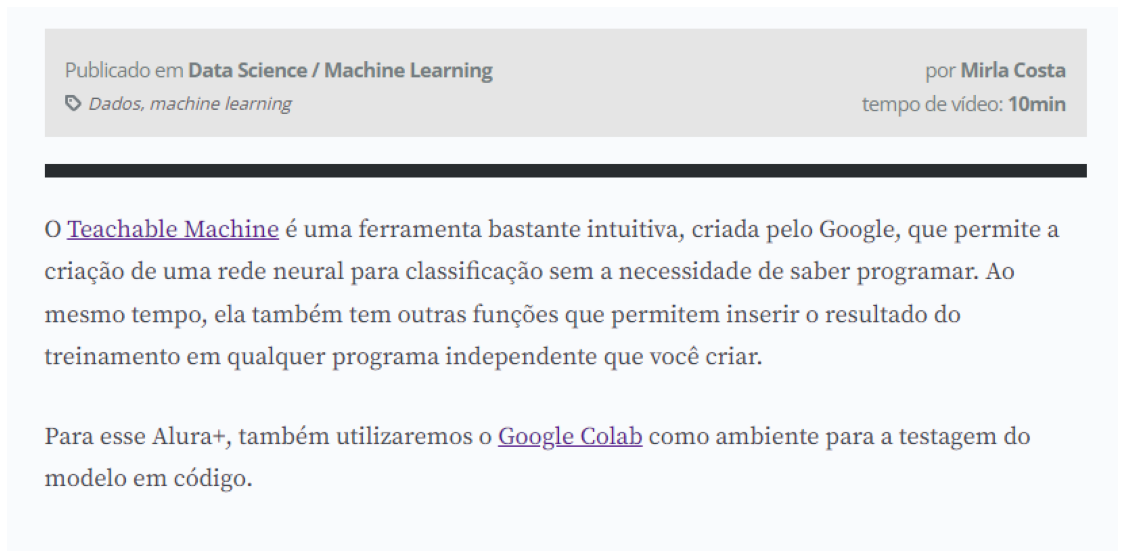

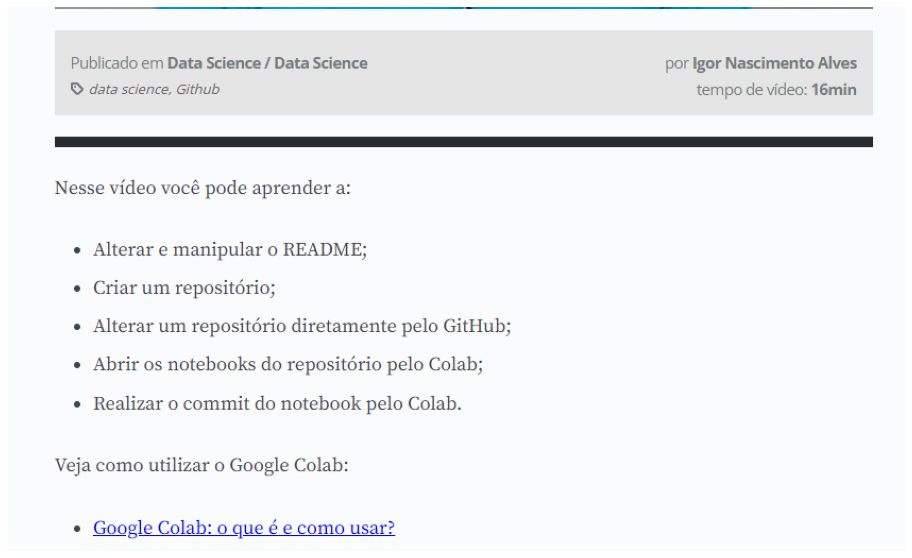

In [36]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)

In [37]:
config_tesseract = "--tessdata-dir tessdata"

def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

In [42]:
texto_completo = ''
nome_txt = 'resultados_ocr_atividade.txt' 

In [43]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  nome_divisao = '===============\n' + str(nome_imagem)
  texto_completo = texto_completo + nome_divisao + '\n'
  texto = OCR_processa(img, config_tesseract)
  texto_completo = texto_completo + texto

In [46]:
arquivo_txt = open(nome_txt, 'w+')
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()

In [44]:
termo_pesquisa = 'ambiente'

In [47]:
with open(nome_txt) as f: 
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]

In [48]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print('===============\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  print('\n')

Aula5-ROC.png
Número de ocorrências para o termo: ambiente: 0


Aula5-Microstrategy.png
Número de ocorrências para o termo: ambiente: 0


Aula5-Ambientes_Virtuais.png
Número de ocorrências para o termo: ambiente: 13


Aula5-Visao.png
Número de ocorrências para o termo: ambiente: 1


Aula5-GitHub.png
Número de ocorrências para o termo: ambiente: 0




## Reconhecimento na imagem

In [49]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'

In [70]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255),tamanho_texto=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte, fill=cor)
  img = np.array(img_pil)
  return img

In [53]:
min_conf = 30 #@param {type: 'slider', min:0, max:100}

In [62]:
def caixa_texto(i, resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]
  
  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [72]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config= config_tesseract, lang='por', output_type=Output.DICT)
  num_ocorrencias = 0
  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
      texto = resultado['text'][i]
      if str.lower(termo_pesquisa) in str.lower(texto):
        x, y, img = caixa_texto(i, resultado, img, (0, 0, 255))
        img = escreve_texto(texto, x, y, img, fonte, (50, 50, 255), 14)
        num_ocorrencias += 1
  return img, num_ocorrencias

In [56]:
termo_pesquisa='learning'

artigo-termos-ML.png
Número de ocorrências para learning em: artigo-termos-ML.png: 3




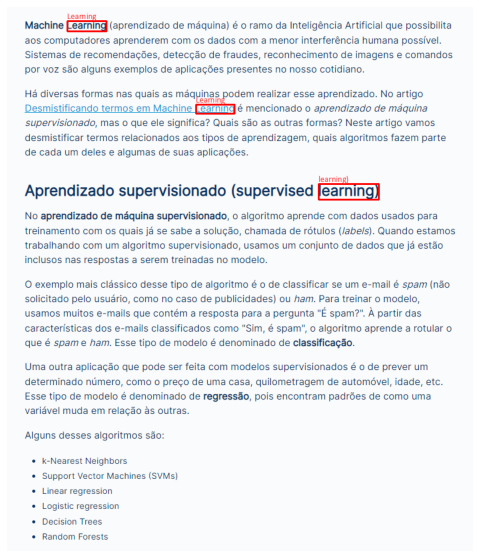

artigo-desbalanceamento.png
Número de ocorrências para learning em: artigo-desbalanceamento.png: 1




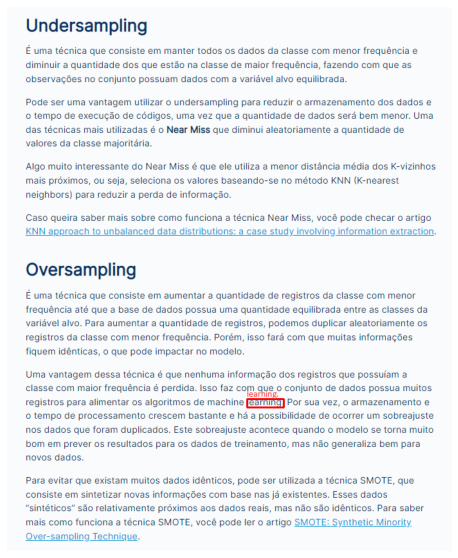

artigo-spark.png
Número de ocorrências para learning em: artigo-spark.png: 1




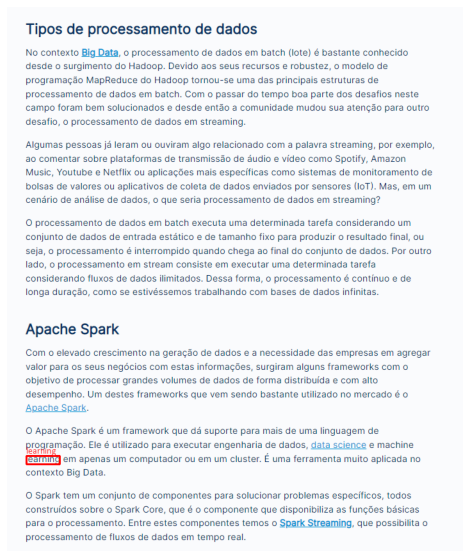

artigo-eng-dados.png
Número de ocorrências para learning em: artigo-eng-dados.png: 0




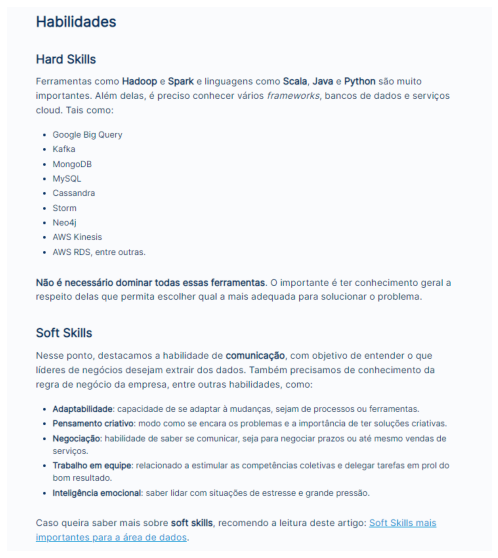

In [73]:
for imagem in caminho:
  img = cv2.imread(imagem)
  img_original = img.copy()

  nome_imagem = os.path.split(imagem)[-1]
  print('===============\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)

  img, num_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)

  print('Número de ocorrências para {} em: {}: {}'.format(termo_pesquisa, nome_imagem, num_ocorrencias))
  print('\n')

  mostrar(img)

---
## Itens trabalhados na aula
* Criar um leitor para todas as imagens em uma pasta;
* Buscar por termos específicos dentro do texto;
* Retirar todo o texto da imagem e salvar em um arquivo de texto .txt;
* Buscar termos específicos dentro de cada imagem e fazer o bouding box;
* Salvar todas as imagens com termos específicos destacados.